# Titanic Tutorial
### Solving Date: Jan 5th, 2024
#### Written by: [Jehwan Kim](https://github.com/kreimben)
#### Followed Materials:
* [https://kaggle-kr.tistory.com/17](https://kaggle-kr.tistory.com/17)
* [https://kaggle-kr.tistory.com/18](https://kaggle-kr.tistory.com/18)

1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.
5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 1. Dataset Check

In [3]:
# Pclass   | class of tickets (1st = 1, etc...)
# SibSp    | number of family (sibling and spouse)
# Parch    | number of family (children and parents)
# Ticket   | ticket serial number
# Cabin    | seat serial number
# Embarked | which port the passenger boarded

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head() # on tutorial variable.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
for col in df_train.columns:
    df_train[ col ].info()
    print('==========================')

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: PassengerId
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
<class 'pandas.cor

> 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 **Survived** 입니다.

In [6]:
df_train.describe() # desc about fields.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
for col in df_train.columns:
    print(f'{col=:>12}    Null %: {100 * (df_train[col].isnull().sum() / df_train[col].shape[0]):.2f}%')
    print(f'\t\t    NaN %: {100 * (df_train[col].isna().sum() / df_train[col].shape[0]):.2f}%')
    print()

col= PassengerId    Null %: 0.00%
		    NaN %: 0.00%

col=    Survived    Null %: 0.00%
		    NaN %: 0.00%

col=      Pclass    Null %: 0.00%
		    NaN %: 0.00%

col=        Name    Null %: 0.00%
		    NaN %: 0.00%

col=         Sex    Null %: 0.00%
		    NaN %: 0.00%

col=         Age    Null %: 19.87%
		    NaN %: 19.87%

col=       SibSp    Null %: 0.00%
		    NaN %: 0.00%

col=       Parch    Null %: 0.00%
		    NaN %: 0.00%

col=      Ticket    Null %: 0.00%
		    NaN %: 0.00%

col=        Fare    Null %: 0.00%
		    NaN %: 0.00%

col=       Cabin    Null %: 77.10%
		    NaN %: 77.10%

col=    Embarked    Null %: 0.22%
		    NaN %: 0.22%


In [8]:
for col in df_test.columns:
    print(f'{col=:>12}    Null %: {100 * (df_test[col].isnull().sum() / df_test[col].shape[0]):.2f}%')
    print(f'\t\t    NaN %: {100 * (df_test[col].isna().sum() / df_test[col].shape[0]):.2f}%')
    print()

col= PassengerId    Null %: 0.00%
		    NaN %: 0.00%

col=      Pclass    Null %: 0.00%
		    NaN %: 0.00%

col=        Name    Null %: 0.00%
		    NaN %: 0.00%

col=         Sex    Null %: 0.00%
		    NaN %: 0.00%

col=         Age    Null %: 20.57%
		    NaN %: 20.57%

col=       SibSp    Null %: 0.00%
		    NaN %: 0.00%

col=       Parch    Null %: 0.00%
		    NaN %: 0.00%

col=      Ticket    Null %: 0.00%
		    NaN %: 0.00%

col=        Fare    Null %: 0.24%
		    NaN %: 0.24%

col=       Cabin    Null %: 78.23%
		    NaN %: 78.23%

col=    Embarked    Null %: 0.00%
		    NaN %: 0.00%


For the pure curiosity between `isna` and `isnull`, Found the answer.

`isna` and `isnull` are **identical** as well.

But there are some recommendations **about using `isna` over `isnull`**. ([stackoverflow](https://stackoverflow.com/questions/52086574/pandas-isna-and-isnull-what-is-the-difference))

To check `null` data more visually, using `missingno` library.

<Axes: >

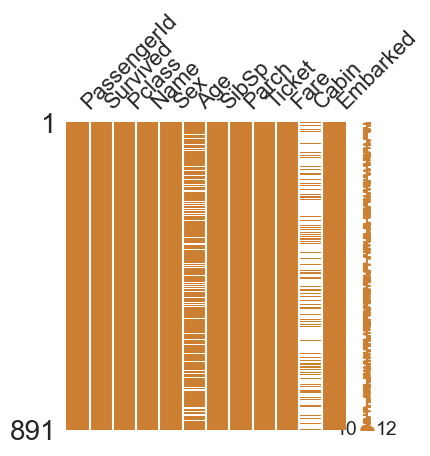

In [9]:
msno.matrix(
    df=df_train,#.iloc[:, :], it's same!
    figsize=(4, 4),
    color=(0.8, 0.5, 0.2)
)

<Axes: >

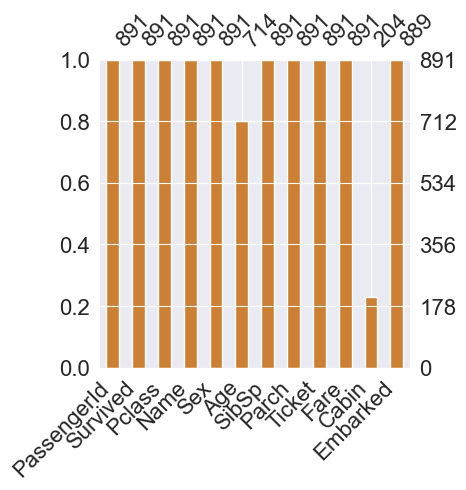

In [10]:
msno.bar(
    df=df_train,
    figsize=(4, 4),
    color=(0.8, 0.5, 0.2)
)

## Checking Target Label
> target label이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
> 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

In [11]:
# To get more definitive data, explicitly by words,
# I refined the data frame.
df_train_def = df_train.copy()
df_train_def['Survived'] = df_train['Survived'].apply(lambda x: 'alive' if x == 1 else 'died')
df_train_def.head(2)
# BUT, THERE ARE PROS AND CONS OF THAT WAY.
# FOR EXAMPLE, I CANNOT GET THE AVERAGE VALUES (RATIO) ON 'HOW MANY PEOPLE SURVIVED?'.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,alive,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<module 'matplotlib.pyplot' from '/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

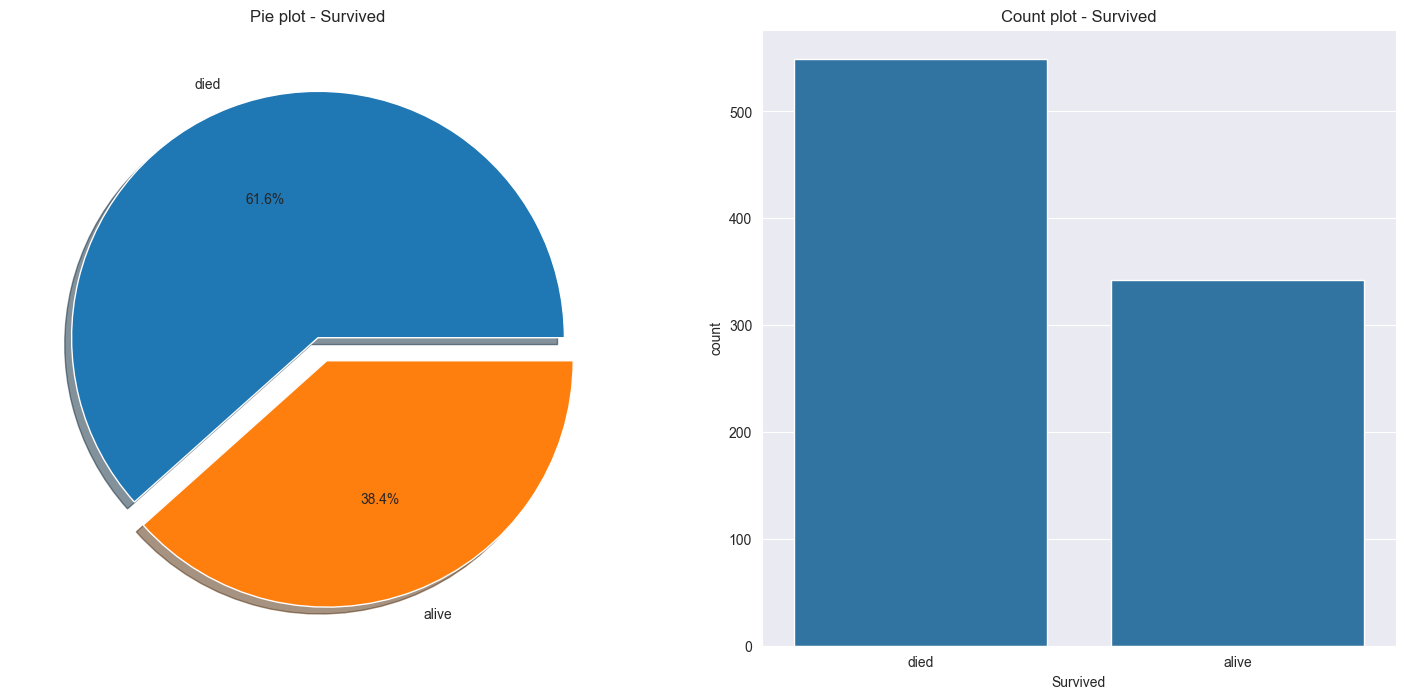

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# left chart
df_train_def['Survived'].value_counts().plot\
    .pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# right chart
sns.countplot(x='Survived', data=df_train_def, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt

> 이제 본격적으로 데이터 분석을 해보겠습니다. 데이터는 매우 많습니다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.

> 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.

### `Pclass` visualisation

In [13]:
# Either `ordinal` and `category` itself.
df_train['Pclass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


To check how many people survived by `Pclass`,

In [14]:
# COUNT
df_train[['Pclass', 'Survived']]\
    .groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
# SUM
df_train[['Pclass', 'Survived']]\
    .groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(
    df_train['Pclass'], df_train_def['Survived'], # for the readability...
    margins=True
).style.background_gradient(cmap='summer_r')

Survived,alive,died,All
Pclass,,,
1,136,80,216
2,87,97,184
3,119,372,491
All,342,549,891


To get a mean value by a class (`Pclass`)...

<Axes: xlabel='Pclass'>

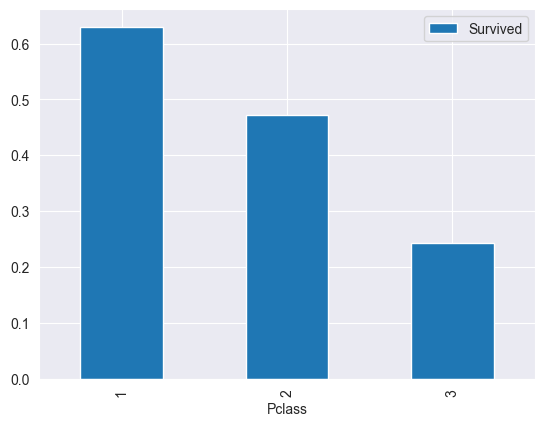

In [17]:
df_train[['Pclass', 'Survived']]\
    .groupby(['Pclass'], as_index=True)\
    .mean()\
    .sort_values(by='Survived', ascending=False)\
    .plot.bar()

<module 'matplotlib.pyplot' from '/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

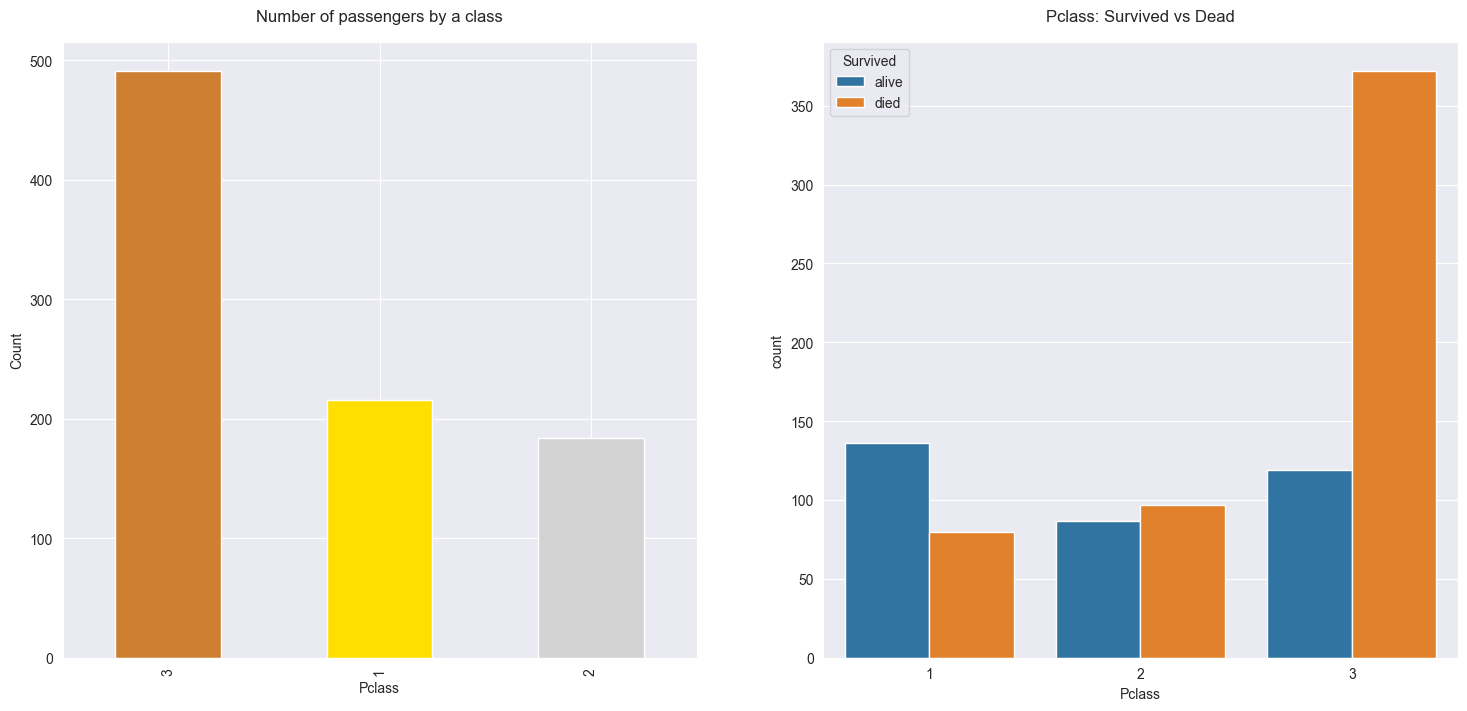

In [18]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# left chart
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers by a class', y=y_position)
ax[0].set_ylabel('Count')

# right chart
sns.countplot(x='Pclass', hue='Survived', data=df_train_def, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt

### `sex` visualisation

It's gonna same as `Pclass`...

<module 'matplotlib.pyplot' from '/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

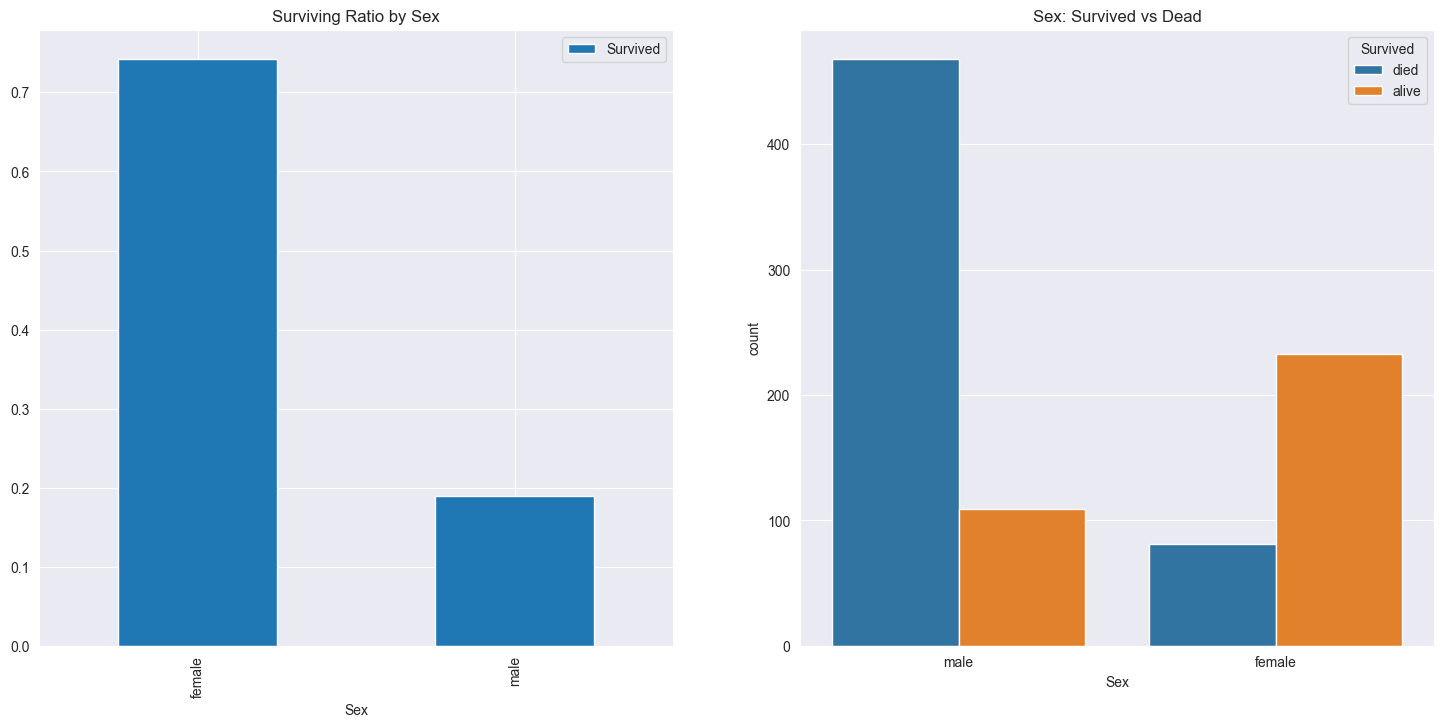

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# left chart
df_train[['Sex', 'Survived']]\
    .groupby(['Sex'], as_index=True)\
    .mean()\
    .plot.bar(ax=ax[0])
ax[0].set_title('Surviving Ratio by Sex')

# right chart
sns.countplot(x='Sex', hue='Survived', data=df_train_def, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt

In [20]:
df_train[['Sex', 'Survived']]\
    .groupby(['Sex'], as_index=True)\
    .mean().sort_values(by='Survived', ascending=True)

,Survived
Sex,
male,0.188908
female,0.742038


In [21]:
pd.crosstab(
    df_train['Sex'], df_train['Survived'],
    margins=True
)\
    .style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Both Sex and Pclass

> 이번에는 `Sex`, `Pclass` 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다

> seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

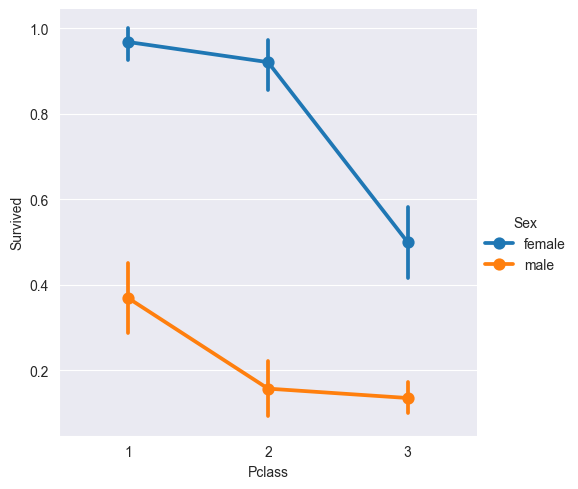

In [22]:
# sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point')

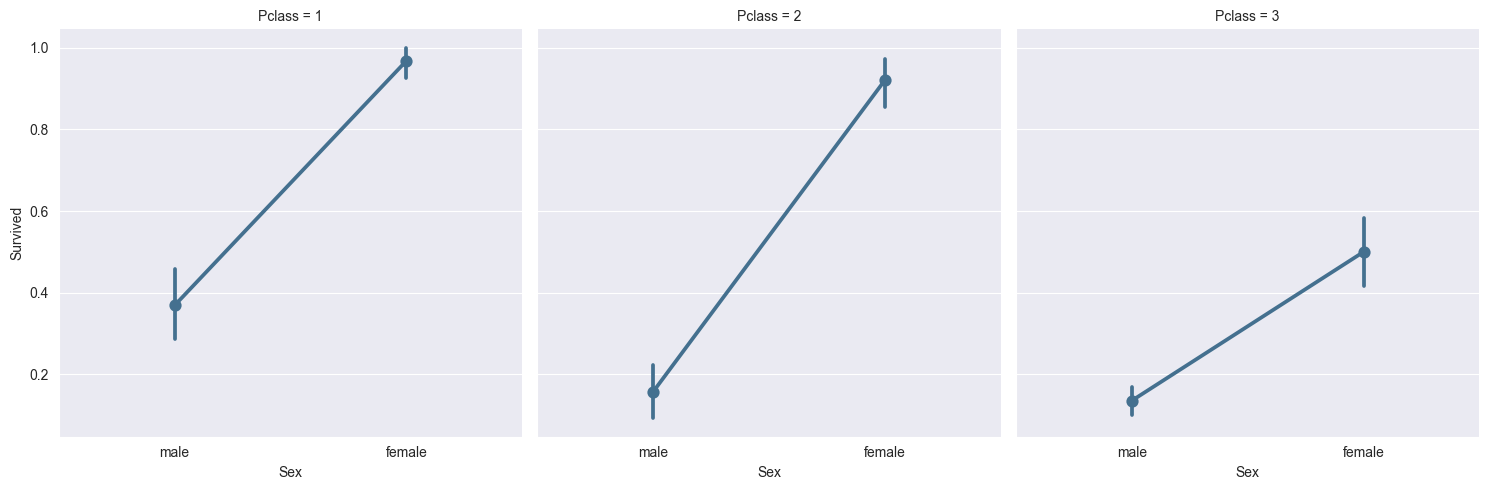

In [23]:
# sns.factorplot(x='Sex', y='Survived', col='Pclass',
#               data=df_train, satureation=.5,
#                size=9, aspect=1)
sns.catplot(x='Sex', y='Survived', col='Pclass',
            data=df_train, saturation=.5,
            kind='point')

### Age

In [24]:
print(f'''
The oldest passenger: {df_train['Age'].max():.1f} Y/O
The youngest passenger: {df_train['Age'].min():.1f} Y/O
The average age of passenger: {df_train['Age'].mean():.1f} Y/O
''')


The oldest passenger: 80.0 Y/O
The youngest passenger: 0.4 Y/O
The average age of passenger: 29.7 Y/O


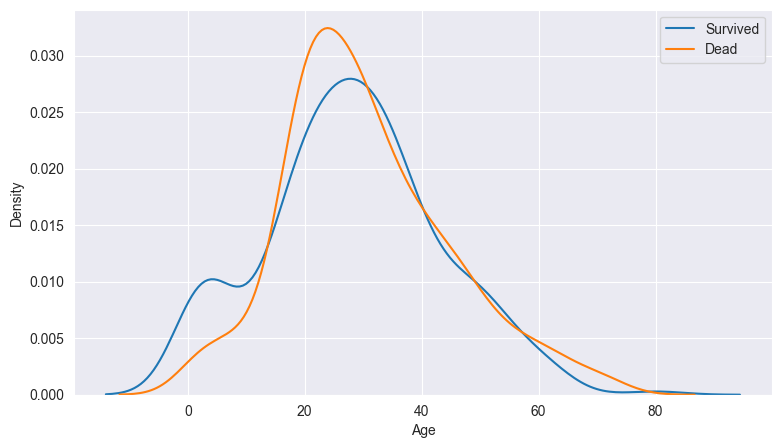

In [25]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[ df_train['Survived'] == 1 ]['Age'], ax=ax)
sns.kdeplot(df_train[ df_train['Survived'] == 0 ]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])

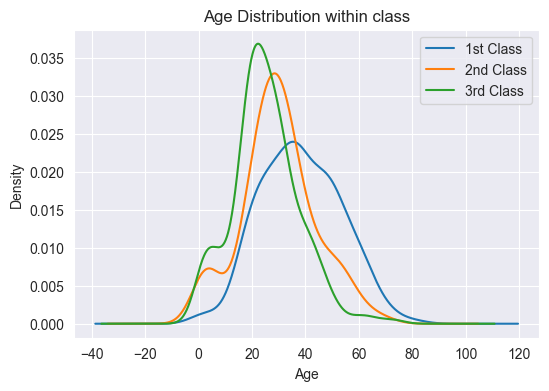

In [26]:
# Age distribution within class

plt.figure(figsize=(6, 4))

df_train['Age'][ df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][ df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][ df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within class')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Class 가 높을 수록 나이 많은 사람의 비중이 커짐.

나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.

나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

Text(0.5, 0, 'Range of Age')

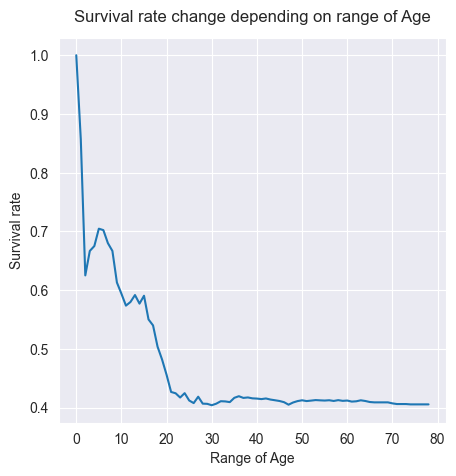

In [27]:
ratio = []

for i in range(1, 80):
    target = df_train[ df_train['Age'] < i]['Survived']
    ratio.append(
        target.sum() / target.count()
    )

plt.figure(figsize=(5, 5))
plt.plot(ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age')

### Pclass, Sex, Age

> 지금까지 본, `Sex`, `Pclass`, `Age`, `Survived` 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot 입니다.

> x 축은 우리가 나눠서 보고싶어하는 case(여기선 `Pclass`, `Sex`) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.

> 한번 그려보겠습니다

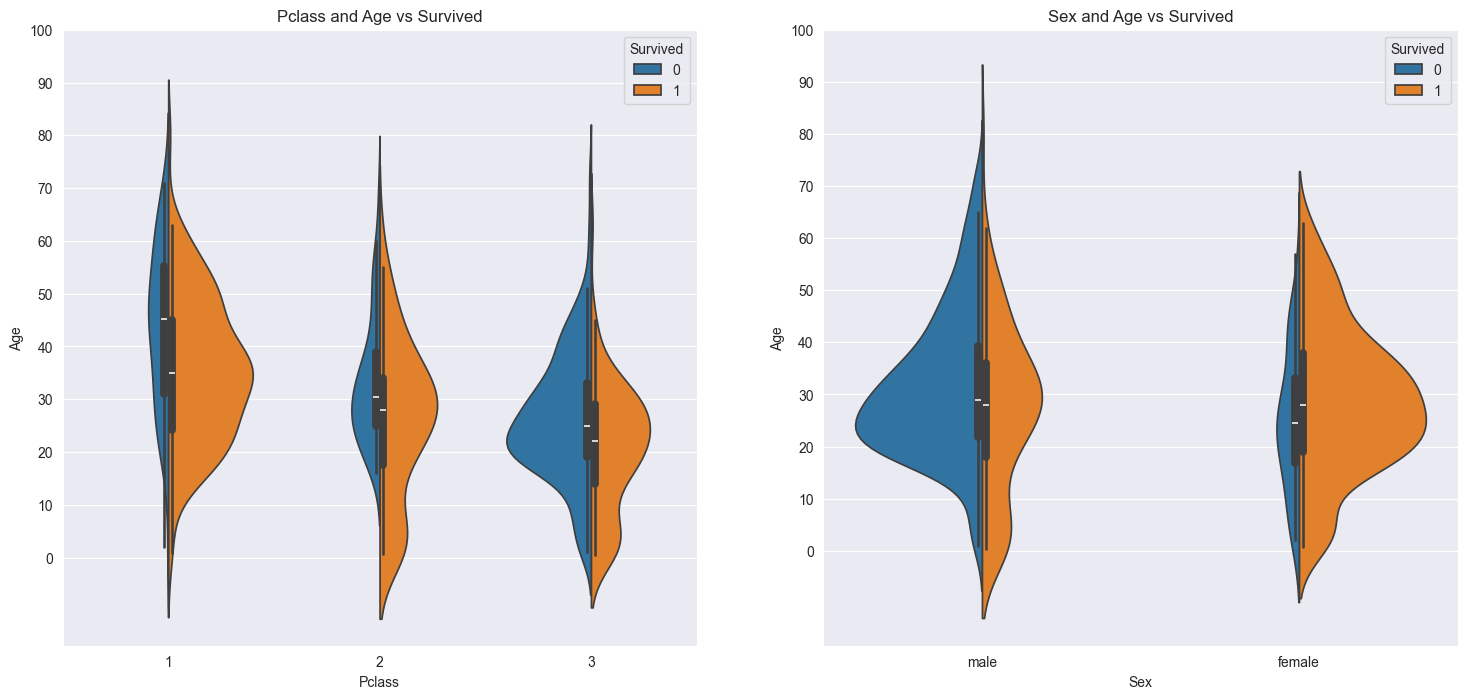

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# left chart
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, density_norm='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# right chart
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, density_norm='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))


1. 생존만 봤을 때, 모든 클래스에서 **나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.**
2. 오른쪽 그림에서 보면, **명확히 여자가 생존을 많이 한것을 볼 수 있습니다.**
3. **여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.**

### Embarked

<Axes: xlabel='Embarked'>

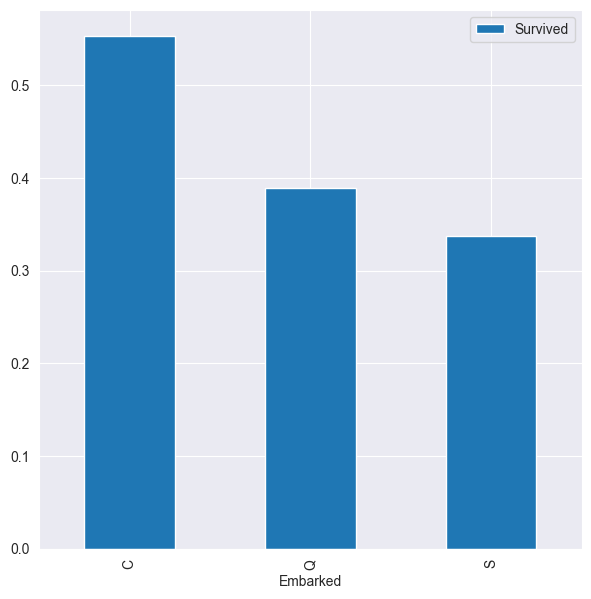

In [29]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

df_train[['Embarked', 'Survived']]\
    .groupby(['Embarked'], as_index=True)\
    .mean().sort_values(by='Survived', ascending=False)\
    .plot.bar(ax=ax)

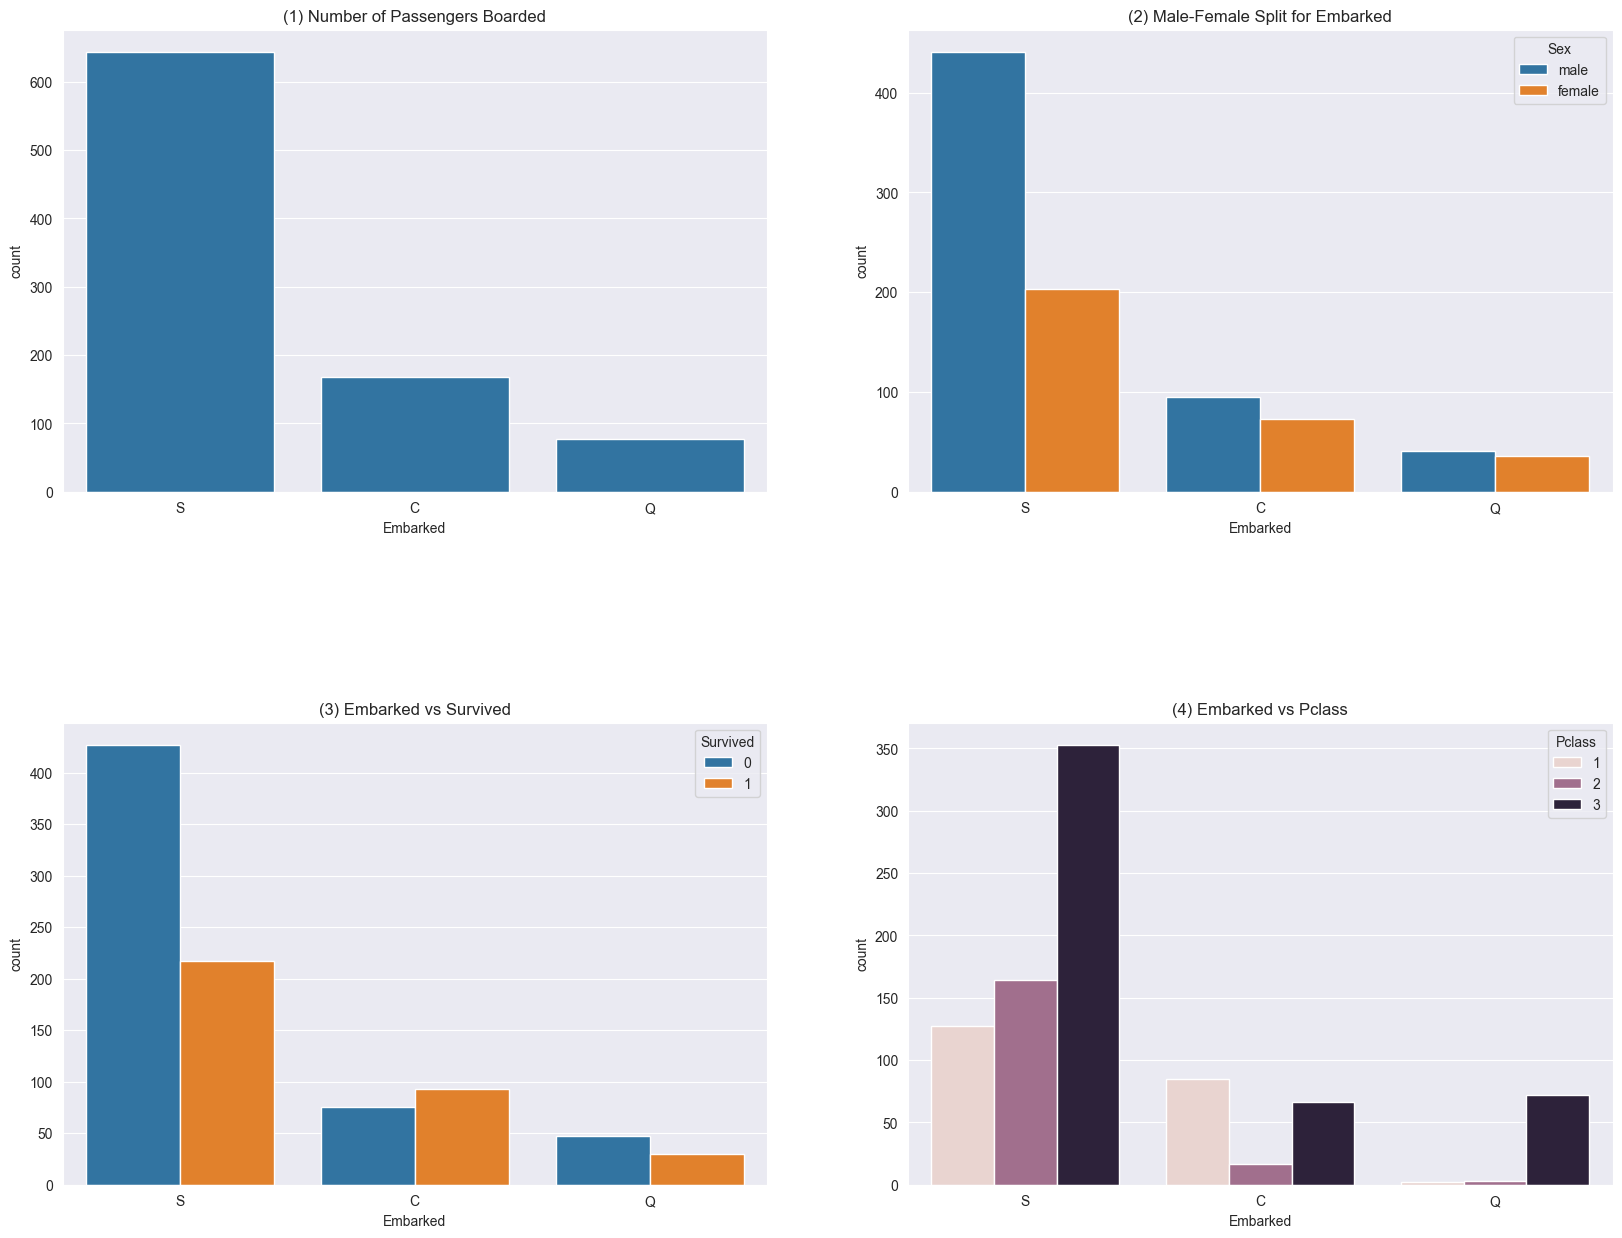

In [30]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) Number of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', data=df_train, hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', data=df_train, hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

### Family - SibSp (형제, 배우자) + Parch (부모, 자녀)

In [31]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 나 자신
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 나 자신

<Axes: xlabel='FamilySize'>

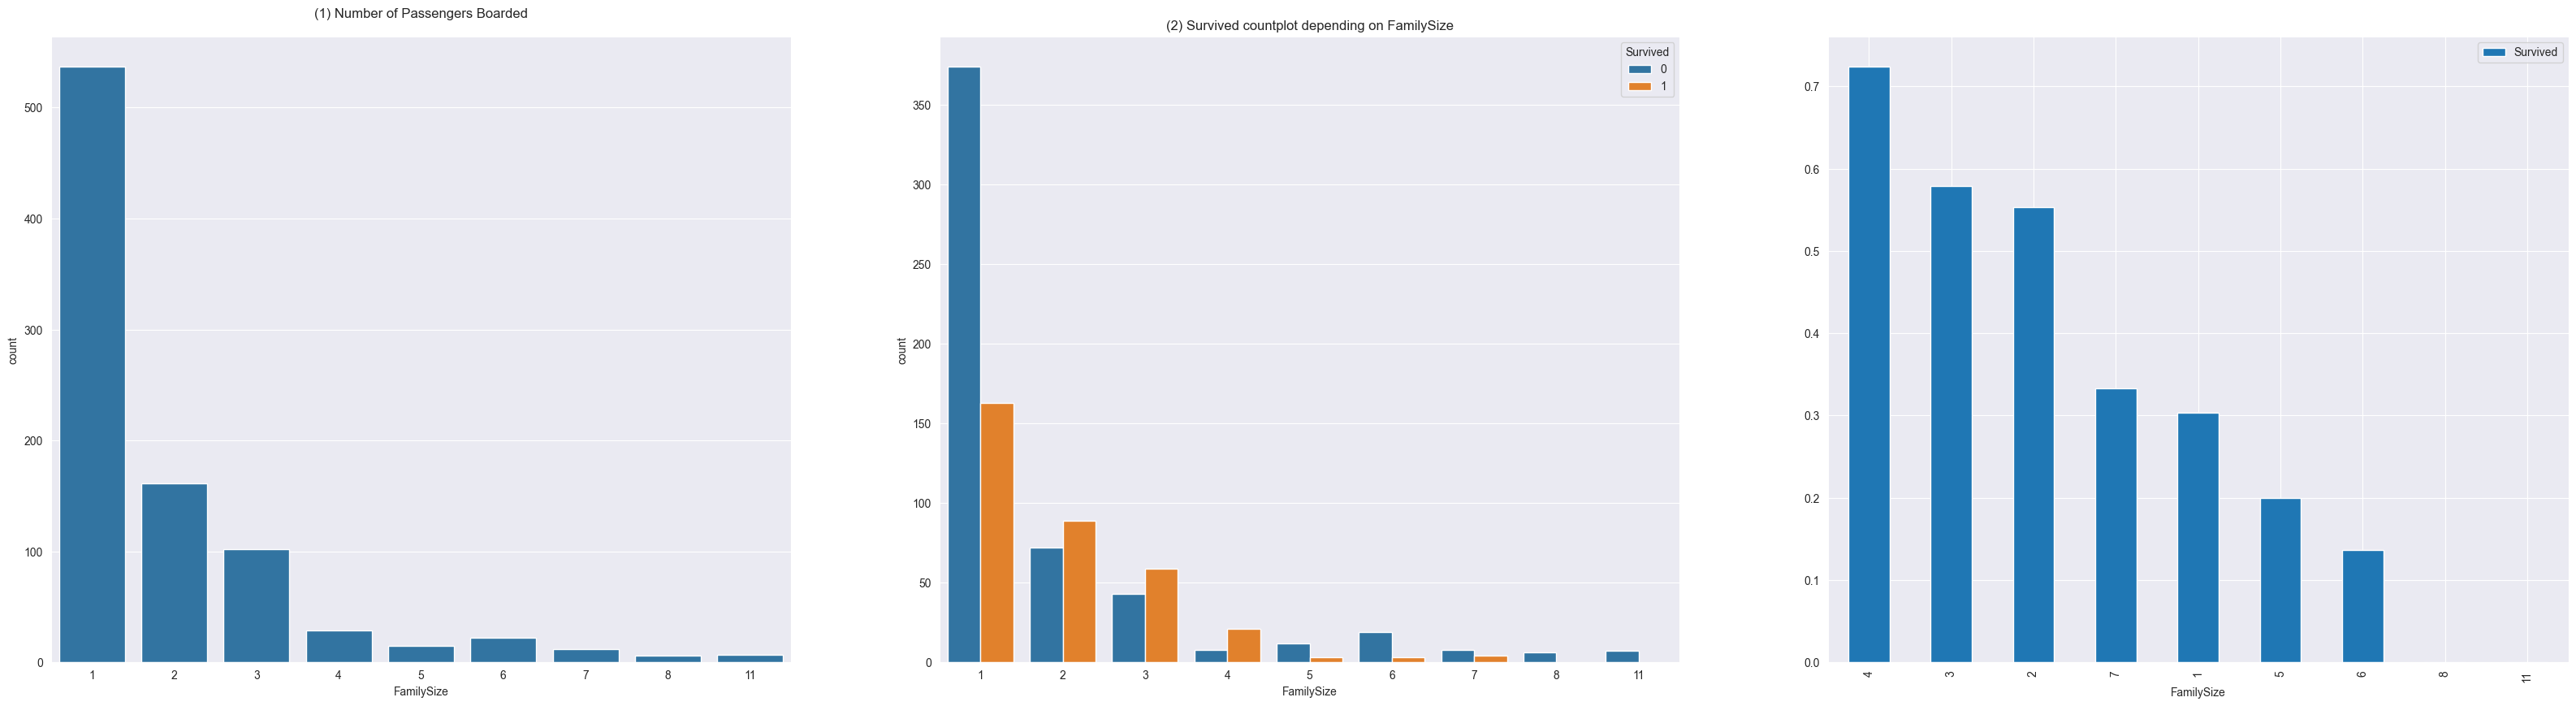

In [32]:
# Relativeness of number of family

f, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) Number of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')

df_train[['Survived', 'FamilySize']].groupby('FamilySize')\
    .mean().sort_values(by='Survived', ascending=False)\
    .plot.bar(ax=ax[2])

가족의 수가 4명인 가정일 수록 생존 확률이 높아짐.
의외로 1인 탑승객은 생존률이 그다지 높지 않은 것을 볼 수 있음...

### Fare

Fare is how much money passengers paid for ticket and it's continuous.
Let's check it's skewness first.

/var/folders/yk/hzm_ywr95w3gr1cvnlndq5_r0000gn/T/ipykernel_83712/956440002.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train['Fare'], color='b', label=f'Skewness: {df_train["Fare"].skew():.2f}', ax=ax)


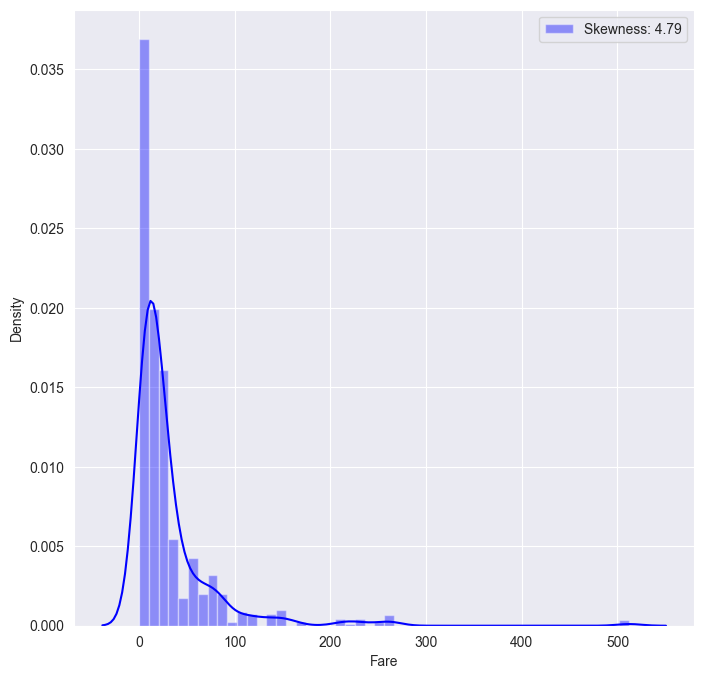

In [33]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='b', label=f'Skewness: {df_train["Fare"].skew():.2f}', ax=ax)
g = g.legend(loc='best')

> 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다 (high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.

1. 과적합의 문제인가?
2. log를 써서 평탄화를 하면 outlier의 영향으로부터 자유로운가? 차라리 튀는 값들을 없애는것이 더 낫지 않은가?

In [34]:
df_test.loc[ df_test.Fare.isna(), 'Fare' ] = df_test['Fare'].mean() # just substitute nan value as a mean value.

df_train['Fare'] = df_train['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

/var/folders/yk/hzm_ywr95w3gr1cvnlndq5_r0000gn/T/ipykernel_83712/4079123826.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train.Fare, color='b', label=f'Skewness: {df_train.Fare.skew():.2f}', ax=ax)


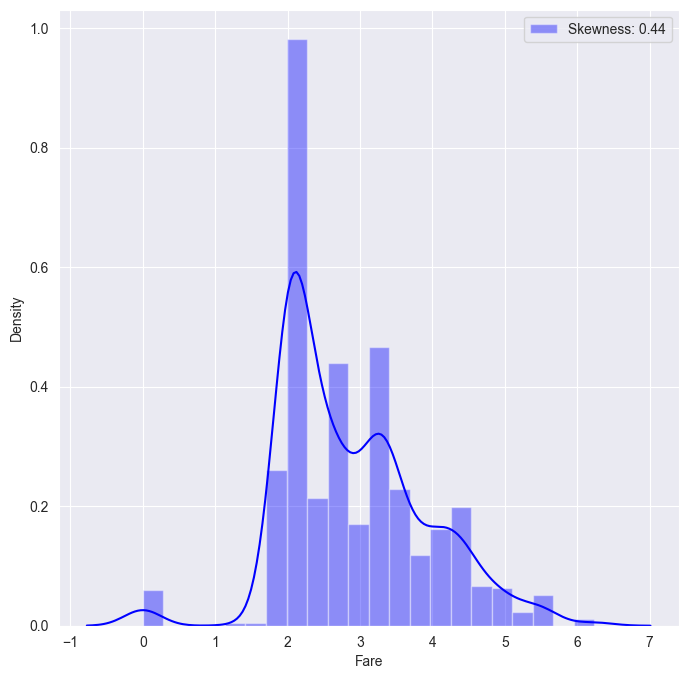

In [35]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train.Fare, color='b', label=f'Skewness: {df_train.Fare.skew():.2f}', ax=ax)
g = g.legend(loc='best')

### Cabin
pass it cuz there are so many nan values.

### Ticket

In [36]:
df_train.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

> 보시다시피, ticket number 는 매우 다양합니다. 우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?

> 여러분이 직접 한번 아이디어를 내보세요! 이것이 본격적인 캐글 레이스의 시작점입니다 ^^

...
티켓 넘버로 무언가를 해볼 수 있을까?
일련번호는 특수한 규칙을 이용해 만들어지거나 단순히 누적합 일 수 있다.
ML의 영역에서 serial을 분석하는게 가능할까...

## 3. Feature Engineering

* fill the `na` value.
* performances depend on how to fill the `na` value.
* test set should be adjusted as same as train set be did.

### fill null in `Age` using title

In [37]:
# how many null data in Age feature?
count = 0
for x in df_train.Age.isna():
    if x: count += 1
print(f'There are {count} empty values in Age feature!')

There are 177 empty values in Age feature!


> Age 에는 null data가 177개나 있습니다. 이를 채울 수 있는 여러 아이디어가 있을 것인데, 여기서 우리는 title + statistics 를 사용해 보겠습니다.

In [38]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') # let's extract the saluations.
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.') # let's extract the saluations.

In [39]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs


In [40]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [41]:
df_train['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],
    inplace=True
)

df_test['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr']
    ,inplace=True
)

In [42]:
df_train[['Initial', 'Survived']].groupby('Initial').mean()

,Survived
Initial,
Master,0.575000
Miss,0.704301
Mr,0.162571
Mrs,0.795276
Other,0.111111


<Axes: xlabel='Initial'>

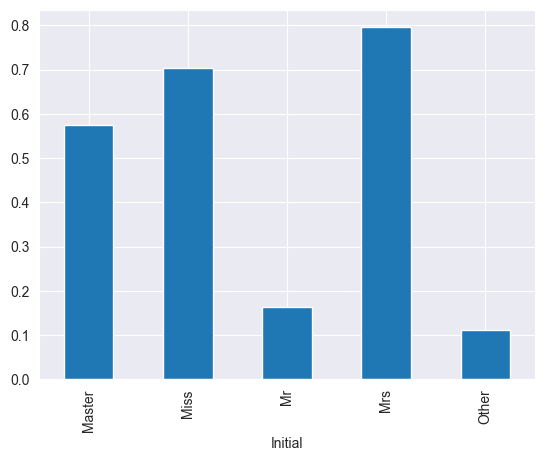

In [43]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [44]:
df_train[['Initial', 'Survived', 'Pclass', 'Age']].groupby('Initial').mean()

,Survived,Pclass,Age
Initial,,,
Master,0.575000,2.625000,4.574167
Miss,0.704301,2.284946,21.860000
Mr,0.162571,2.381853,32.739609
Mrs,0.795276,1.984252,35.981818
Other,0.111111,1.666667,45.888889


In [45]:
df_initial = df_train[['Initial', 'Age']].groupby('Initial').mean()
df_initial

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


Now, I will fill `na` using this mean value.

In [46]:
# populate the main titles EXCEPT 'Other'.
df_initial.index
# df_initial.loc['Master']

Index(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], dtype='object', name='Initial')

In [47]:
df_bac = df_train.copy() # just for backup.
df_bac

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1,Mr


In [48]:
df_age_mean = df_bac.groupby(['Survived','Initial'])['Age'].transform('mean')

In [49]:
# df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
# df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
# df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
# df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
# df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

# df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
# df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
# df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
# df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
# df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

df_bac['Age'] = df_bac['Age'].fillna(df_age_mean)

In [50]:
df_bac.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
Initial          0
dtype: int64

In [51]:
df_bac[ df_bac.Age.isna() ].Initial

Series([], Name: Initial, dtype: object)

In [52]:
df_train = df_bac
del df_bac, df_initial

In [53]:
df_test['Age'] = df_train.Age

Filled every nan data in age feature!

### Fill null in Embarked

In [54]:
# How many people don't have embarked feature?
df_train.Embarked.isna().sum()

2

In [55]:
# df_train#['Embarked']
# df_pivot = pd.pivot(df_train, index='Embarked', columns='Age')
# df_pivot
# Embarked 별로 몇개씩 있는지 집계 테이블을 만들고 싶었지만...

# 1.
df_train.groupby('Embarked').count()['Age']

# 2.
df_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [56]:
# Fill the value with `S`.
df_train['Embarked'].fillna('S', inplace=True)

## Change Initial, Embarked and Sex (String to Numerical)

In [57]:
df_train['Initial'] = df_train['Initial'].map({
    'Master': 0,
    'Miss': 1,
    'Mr': 2,
    'Mrs': 3,
    'Other': 4
})

df_test['Initial'] = df_test['Initial'].map({
    'Master': 0,
    'Miss': 1,
    'Mr': 2,
    'Mrs': 3,
    'Other': 4
})

In [58]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [59]:
df_train.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [60]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [61]:
# test if there are still na values.
df_train.Embarked.isna().sum()
df_test.Embarked.isna().sum()

0

In [62]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

#### Fix every string values to numeric values for calculating relevance.

Draw heapmap using `corr()`.

<Axes: title={'center': 'Pearson Correlation of Features'}>

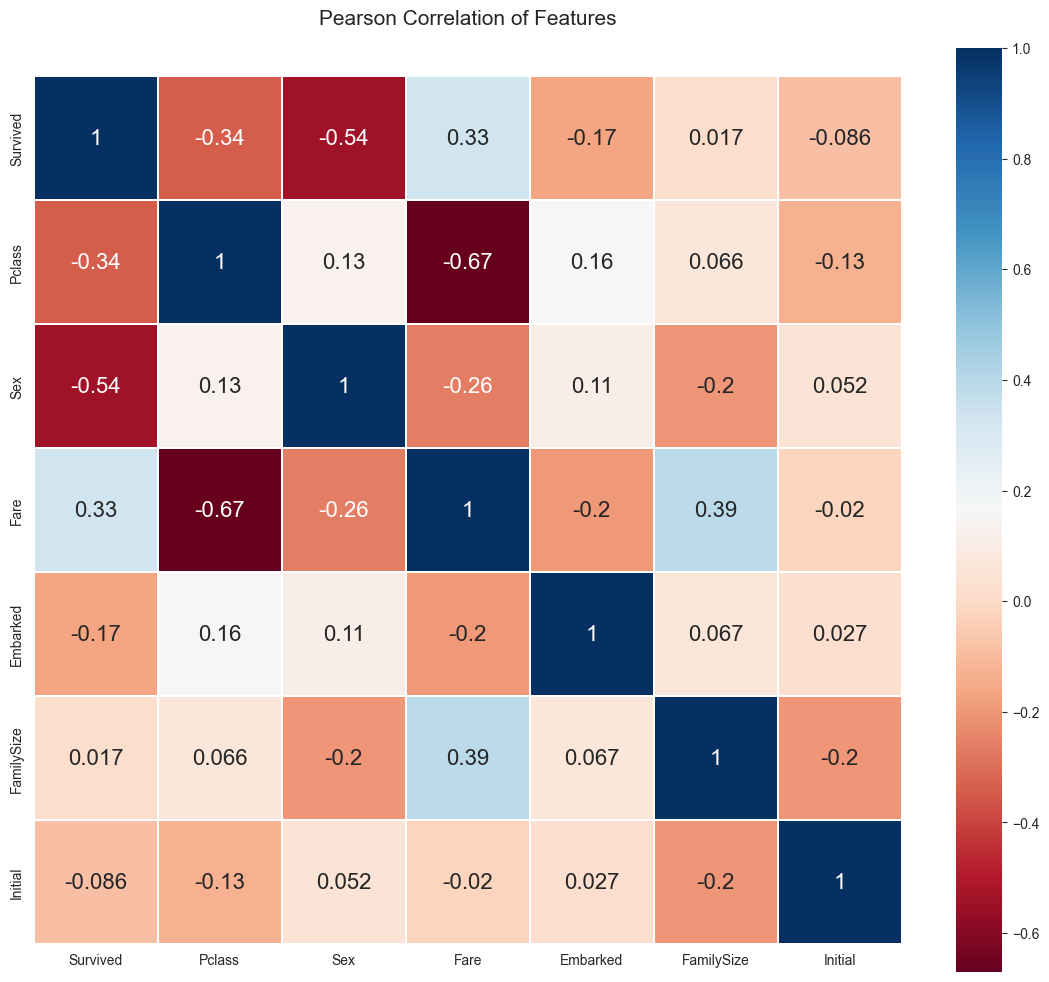

In [63]:
data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial']]

color_map = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=color_map, linecolor='white', annot=True, annot_kws={'size': 16})

Fare과 Pclass의 높은 상관관계를 띄고 있으나 상식적인 내용이라 pass,
그 외에는 성별과 생존여부가 유의미하게 나왔다.
딱히 상관관계가 있는 feature들이 없어보인다.

### One-hot encoding on Initial and Embarked

In [64]:
# For the model's performance
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [65]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,False,False,False,True,False


In [66]:
# 마찬가지로 Embarked feature도 one-hot encoding을 해준다... (아직 이게 어떻게 왜 성능을 향상 시킨다는건지 모르겠다...)
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

### Drop Columns

In [67]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [68]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,False,False,True,False,False,False,False,True
1,1,1,0,38.0,4.266662,2,False,False,False,True,False,True,False,False
2,1,3,0,26.0,2.070022,1,False,True,False,False,False,False,False,True
3,1,1,0,35.0,3.972177,2,False,False,False,True,False,False,False,True
4,0,3,1,35.0,2.085672,1,False,False,True,False,False,False,False,True


In [69]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,22.0,2.057860,1,False,False,True,False,False,False,True,False
1,3,0,38.0,1.945910,2,False,False,False,True,False,False,False,True
2,2,1,26.0,2.270836,1,False,False,True,False,False,False,True,False
3,3,1,35.0,2.159003,1,False,False,True,False,False,False,False,True
4,3,0,35.0,2.508582,3,False,False,False,True,False,False,False,True


## Building machine learning model and prediction using the trained model

In [70]:
# split dataset into train, valid, test set

X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

# test -> valid -> test

In [71]:
X_tr, X_vld, Y_tr, Y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=990321)
# test_size 0.3 => split the dataset 80% for test and 20% for valid dataset.
# random_state = random seed.

In [72]:
model = RandomForestClassifier()
model.fit(X_tr, Y_tr)
prediction = model.predict(X_vld)

In [73]:
f'Predicted survival {100 * metrics.accuracy_score(prediction, Y_vld):.2f}% out of {Y_vld.shape[0]} people'

'Predicted survival 84.92% out of 179 people'

## Feature Importance

지금 모델은 당연히 학습된 feature들에 영향을 가짐. 그래서 얼마나 그 수치를 가졌는지 구해보는 단계.

In [74]:
from pandas import Series

feature_importance = model.feature_importances_
series_feat_imp = Series(feature_importance, index=df_test.columns)

In [75]:
feature_importance

array([0.08454017, 0.11437555, 0.25102126, 0.23384762, 0.0797817 ,
       0.01017095, 0.03200137, 0.12330659, 0.02850997, 0.00646331,
       0.01331292, 0.00911937, 0.01354921])

<module 'matplotlib.pyplot' from '/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

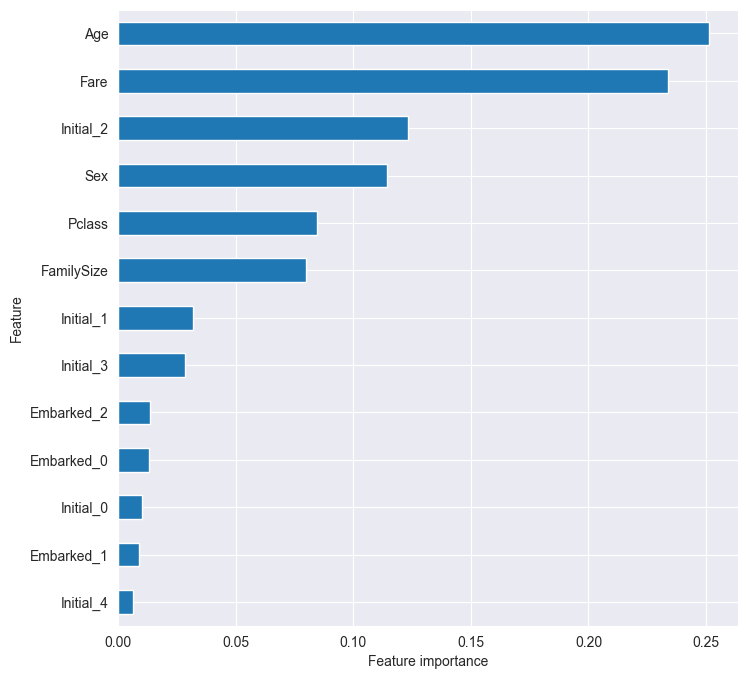

In [76]:
plt.figure(figsize=(8, 8))
series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt

위에서 봤듯이 나이와 요금이 높은 상관관계를 보였고, initial 2인 'Mr'이 영향을 줬다.
블로그와 그래프가 낮게 나온 이유는 나이대를 분류화 하지 않아서 그러지 않을까 싶다.

## Prediction on Test set

In [77]:
submission = pd.read_csv('gender.csv')

In [78]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [79]:
X_test = df_test.values
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
submission['Survived'] = prediction

In [81]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [82]:
submission.to_csv('tistory_blog_submission.csv', index=False)

![image](kaggle_leaderboard_1.png "Kaggle Leaderboard")